# MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [ ]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

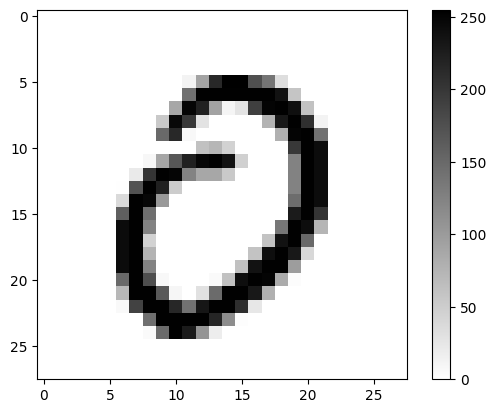

In [ ]:
# 아래 숫자를 바꿔가며 화면에 그려봄.
n = 5330

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [ ]:
# 옵션추가.
np.set_printoptions(linewidth= np.inf)

x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  92, 214, 255, 254, 176, 138,  33,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 143, 253, 253, 253, 253, 253, 253, 236,  58,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 250, 221,  93,  10,  27, 192, 251, 253, 240,  61,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 246, 199,  28,   0,   0,   0,   0,  76, 230, 253, 208,  12,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 150, 215,   7,   0,   0,   0,   0,   0,   0,  79, 251, 253, 142,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  62,  73,  45,   0,   0,   0,   0, 199, 253, 243,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8,  89, 168, 223, 249, 253, 236,  47,   0,   0,   0, 125, 253, 243,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  21, 203, 253, 250, 124,  88,  88,  54,   0,   0,   0,   0, 125, 253, 243,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1, 172, 253, 222,  51,   0,   0,   0,   0,   0,   0,   0,   0, 125, 253, 243,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  37, 253, 248, 102,   0,   0,   0,   0,   0,   0,   0,   0,   0, 146, 253, 243,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 160, 253, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 228, 253, 203,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 244, 253, 124,   0,   0,   0,   0,   0,   0,   0,   0,   0, 136, 253, 242,  74,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 244, 253,  45,   0,   0,   0,   0,   0,   0,   0,   0,  60, 236, 253, 150,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 244, 253,  76,   0,   0,   0,   0,   0,   0,   0,  60, 241, 253, 230,  39,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 244, 253, 124,   0,   0,   0,   0,   0,   0,  62, 236, 253, 253,  98,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 150, 253, 177,   7,   0,   0,   0,   5,  62, 241, 253, 251,  84,   3,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  71, 253, 253, 166,   9,   0,  30, 148, 253, 253, 230,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   6, 188, 253, 253, 216, 140, 233, 253, 253, 209,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 144, 253, 253, 253, 253, 218, 114,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5, 148, 253, 228, 106,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

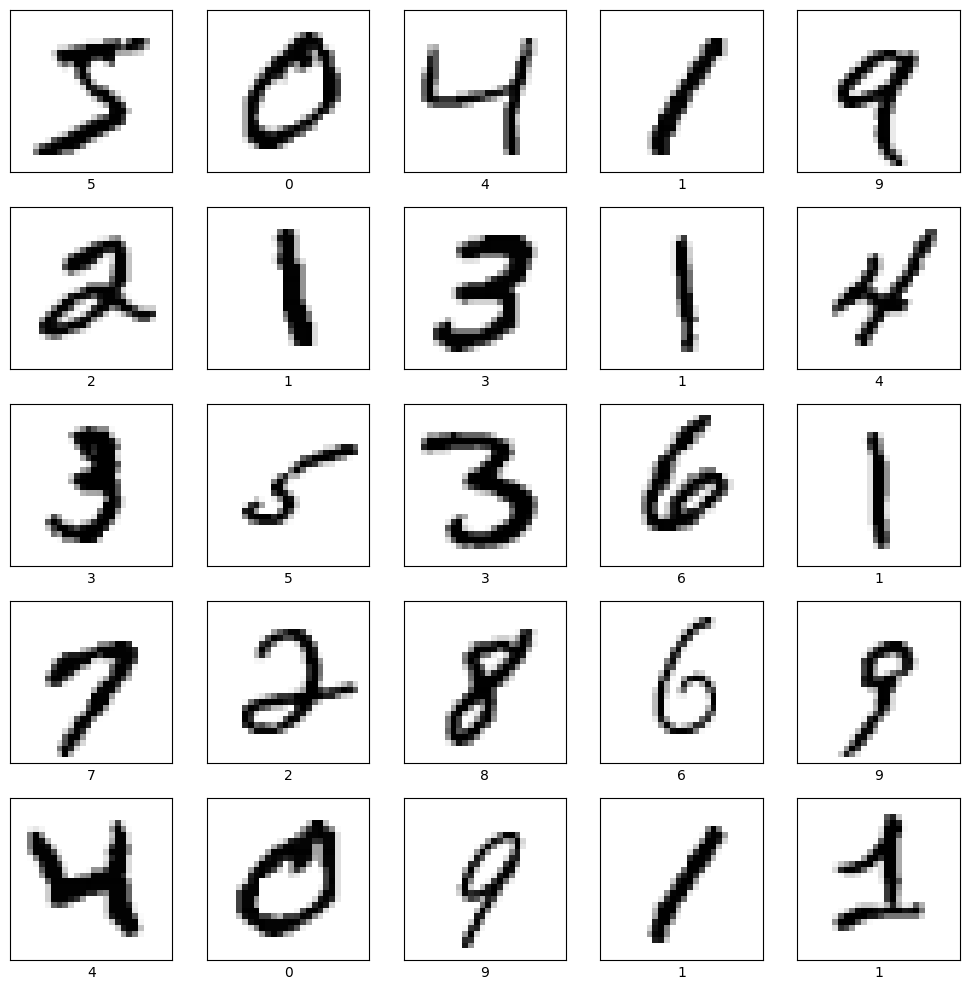

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [ ]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1)) # -1: 알아서 채워줘

[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [ ]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [ ]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_val를 그냥 255로 나누면 됨

In [ ]:
x_train = x_train / 255
x_val = x_val / 255

## 4.모델링

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

784

In [ ]:
clear_session()

model = Sequential(Dense(10, input_shape = (nfeatures,), activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 이미 integer encoding 되어있음
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5133 - val_loss: 0.3179
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3176 - val_loss: 0.2885
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2930 - val_loss: 0.2757
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2810 - val_loss: 0.2720
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2737 - val_loss: 0.2714
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2680 - val_loss: 0.2668
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2643 - val_loss: 0.2629
Epoch 8/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2604 - val_loss: 0.2616
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2576 - val_loss: 0.2631
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.255

* 학습결과 그래프

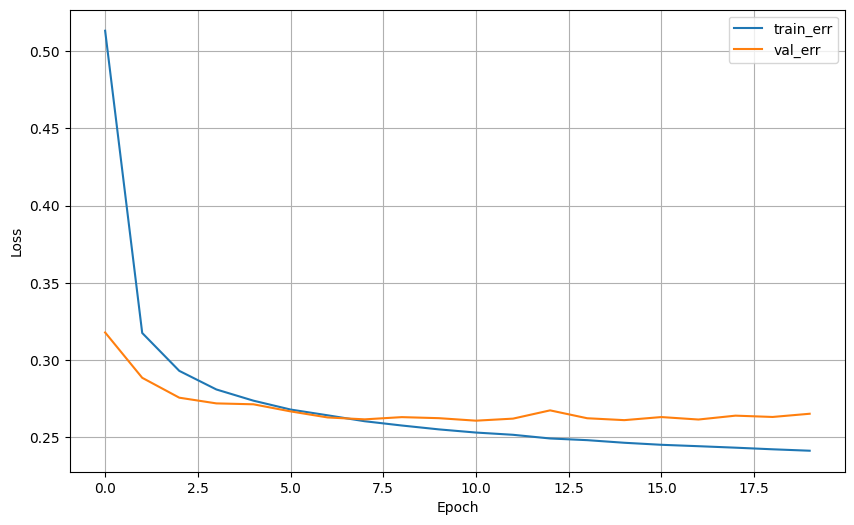

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_val)
pred[:5]

313/313 [==============================] - 0s 1ms/step


array([[3.05524885e-08, 1.15340490e-13, 3.92054346e-07, 4.50086687e-03, 1.22648160e-07, 1.54978970e-05, 6.57201259e-15, 9.95269597e-01, 4.78206994e-06, 2.08682002e-04],
       [1.55927337e-05, 8.35978608e-06, 9.98394310e-01, 1.90772221e-06, 2.25409046e-16, 2.19444992e-04, 1.35239924e-03, 2.73201378e-21, 7.93699655e-06, 1.39874112e-18],
       [5.49401364e-07, 9.87979054e-01, 7.98339769e-03, 1.14538777e-03, 1.01708982e-04, 5.27127646e-04, 4.41393291e-04, 7.12194960e-05, 1.60144665e-03, 1.48606981e-04],
       [9.99773920e-01, 1.19662995e-11, 4.89828235e-05, 3.11318581e-06, 3.91688246e-08, 2.56295880e-05, 1.33820620e-04, 6.11314726e-06, 2.50486664e-06, 5.92669312e-06],
       [1.91478466e-04, 3.88372108e-08, 1.48361491e-03, 9.39539314e-06, 9.79721189e-01, 4.25476246e-05, 1.10481144e-03, 1.42026029e-03, 1.52461440e-03, 1.45021975e-02]], dtype=float32)

In [ ]:
pred_1 = pred.argmax(axis=1)
pred_1[:5]

array([7, 2, 1, 0, 4])

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 954    0    0    2    1    7   13    2    1    0]
 [   0 1121    3    2    0    1    3    2    3    0]
 [   3   13  944   13    8    4   13    8   22    4]
 [   2    0   23  920    1   29    2   10   13   10]
 [   1    1    7    1  918    0    9    4    5   36]
 [   7    2    3   33    7  790   15    6   23    6]
 [   9    3    9    1    6   16  911    1    2    0]
 [   1    6   24    7    6    1    0  948    1   34]
 [   8   11    8   29    8   46   12   11  826   15]
 [  11    8    1   12   23    6    0   24    4  920]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.88      0.89      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정함)
    * learning_rate

### (1) 모델1

In [ ]:
clear_session()

model2 = Sequential([Dense(512, input_shape=(nfeatures,), activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(10, activation='softmax')])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 476490 (1.82 MB)
Trainable params: 476490 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy')

hist2 = model2.fit(x_train, y_train, epochs=15, validation_split=.2, verbose=0).history

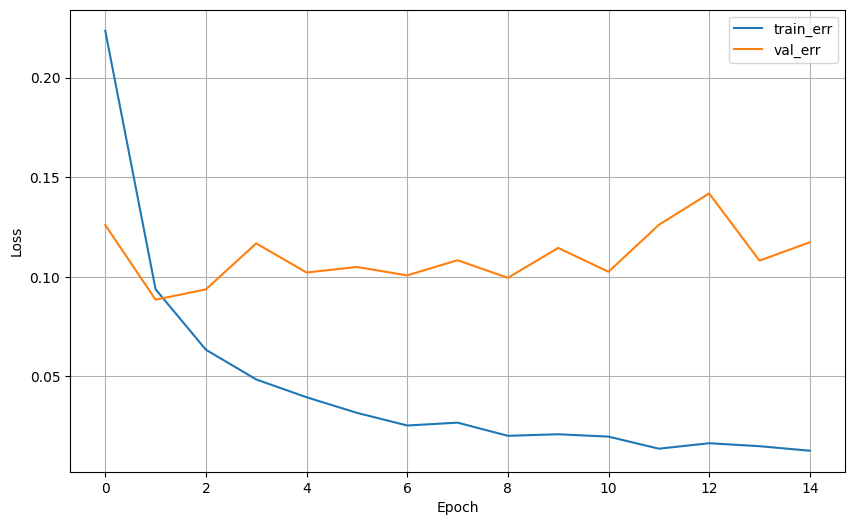

In [ ]:
dl_history_plot(hist2)

In [ ]:
pred2 = model2.predict(x_val)
pred2[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.4925207e-24, 2.8011371e-15, 2.9170571e-16, 1.5119477e-15, 2.4336731e-20, 3.0346897e-19, 3.6752410e-26, 1.0000000e+00, 5.7740321e-18, 2.4166402e-10],
       [1.9799312e-14, 7.4428912e-15, 1.0000000e+00, 7.3025050e-13, 3.0641698e-17, 1.7957245e-20, 8.9998917e-22, 4.0937546e-14, 6.9348086e-16, 6.5168952e-21],
       [4.3463093e-13, 1.0000000e+00, 5.9678464e-12, 2.3684066e-14, 3.3619166e-11, 1.3050268e-12, 2.3793177e-11, 8.8126834e-10, 4.8813593e-09, 3.8960735e-13],
       [9.9999714e-01, 2.6746057e-11, 1.3583276e-06, 5.0022566e-11, 1.4693095e-09, 3.8402112e-10, 1.4278889e-06, 1.0218331e-07, 2.9630054e-10, 3.0035736e-08],
       [2.3145540e-13, 8.0703006e-13, 4.8203759e-13, 9.1518928e-14, 9.9999774e-01, 3.1908493e-12, 1.6497990e-12, 2.5875095e-09, 2.1680804e-10, 2.2148074e-06]], dtype=float32)

In [ ]:
pred2 = pred2.argmax(axis=1)
pred2[:5]

array([7, 2, 1, 0, 4])

In [ ]:
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))

[[ 973    1    0    2    0    0    2    1    1    0]
 [   1 1121    2    1    0    3    1    2    3    1]
 [   3    0 1003   11    0    0    2    9    3    1]
 [   0    0    1  997    0    6    0    3    1    2]
 [   2    0    1    0  950    0    4    3    0   22]
 [   3    0    0    8    0  872    2    1    2    4]
 [   4    2    0    0    4    8  937    0    3    0]
 [   1    0    4    2    0    0    0 1017    2    2]
 [   2    0    3    8    1    7    1    6  941    5]
 [   4    2    0    4    3    7    0   11    2  976]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.99   

### (2) 모델2

In [ ]:
clear_session()

model3 = Sequential([Dense(64, input_shape=(nfeatures,), activation='relu'),
                     Dense(32, activation='relu'),
                     Dense(16, activation='relu'),
                     Dense(10, activation='softmax')])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy')

hist3 = model3.fit(x_train, y_train, epochs=10, validation_split=.2, verbose=0).history

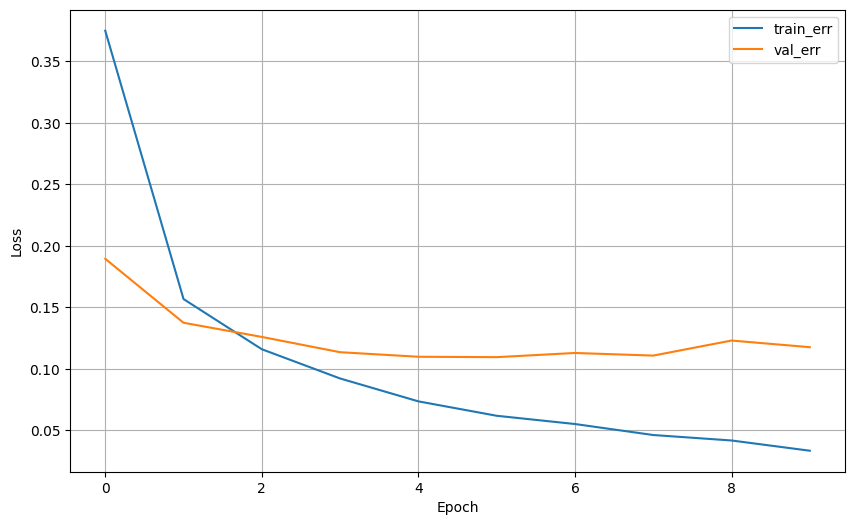

In [ ]:
dl_history_plot(hist3)

In [ ]:
pred3 = model3.predict(x_val)
pred3[:5]

313/313 [==============================] - 1s 1ms/step


array([[5.30494120e-08, 2.10862150e-09, 5.85360021e-06, 6.45388718e-06, 6.24170464e-12, 8.34337541e-08, 9.59663904e-10, 9.99983430e-01, 5.42517114e-07, 3.56771193e-06],
       [2.23387946e-16, 7.48465527e-06, 9.99991059e-01, 1.20266873e-06, 1.95081137e-16, 2.66746753e-07, 5.08332352e-12, 4.42464050e-15, 9.64560810e-12, 4.26984577e-17],
       [5.47482781e-10, 9.99966860e-01, 1.57742909e-06, 2.92634503e-08, 1.61646895e-07, 1.07670509e-07, 6.68872957e-08, 2.90810494e-05, 2.15814475e-06, 2.58308996e-09],
       [9.99987006e-01, 5.33073238e-12, 5.70407383e-06, 2.40353370e-06, 9.62826796e-09, 1.83271140e-07, 2.30542355e-06, 3.61091068e-09, 2.09354596e-08, 2.36049345e-06],
       [9.53903189e-12, 4.53250992e-09, 6.55295951e-09, 6.02809802e-10, 9.99927878e-01, 5.37356160e-10, 2.66877297e-12, 1.32160756e-06, 1.02074786e-10, 7.08427760e-05]], dtype=float32)

In [ ]:
pred3 = pred3.argmax(axis=1)
pred3[:5]

array([7, 2, 1, 0, 4])

In [ ]:
print(confusion_matrix(y_val, pred3))
print(classification_report(y_val, pred3))

[[ 972    0    1    1    0    1    1    1    3    0]
 [   0 1128    1    0    0    1    2    1    2    0]
 [   6    3  970    5    2    1    2   23   20    0]
 [   1    1    5  983    0    4    0    6    9    1]
 [   2    0    3    0  954    0    4    3    0   16]
 [   2    0    0    9    1  860    5    1   12    2]
 [   6    1    0    0   10    4  930    0    7    0]
 [   1    3    5    2    0    1    0 1009    2    5]
 [   4    0    1    4    5    4    1    4  945    6]
 [   2    2    0    9   10    4    0    4    5  973]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.94      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.96      0.98   